# * Kurapati Venkatesh

# * 09012021

# * Topic: Lasso & Ridge Regression  ✨🐱‍🏍

# ---------------------------------------------------------------------------

## Problem Statement:

## Officeworks, is a leading retail store in Australia, with numerous outlets around the country, the manager would like to improve their customer experience by providing them online predictive prices about their gadgets/ Laptops if they wants to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough, to get the objective achieved. Apply Lasso Ridge Regression model on the dataset and predict Price, given other attributes and tabulate R squared ,RMSE and correlation values.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To perform the Lasso and Ridge regression on the given data to predict the prices of the gadgets/ Laptops if they wants to sell them.

## -------------------------------------------------------------------------------------------

### import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

## import dataset:

In [2]:
df = pd.read_csv(r"G:\360digit\assignments meterial\lasso ridge regression\Computer_Data (1).csv")

In [3]:
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


## EDA:

In [5]:
df.describe(include="all")

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259,6259,6259,6259.000000,6259.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3351,5386,5647,NaN,NaN
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,NaN,NaN,NaN,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,NaN,NaN,NaN,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,21.500000


<AxesSubplot:>

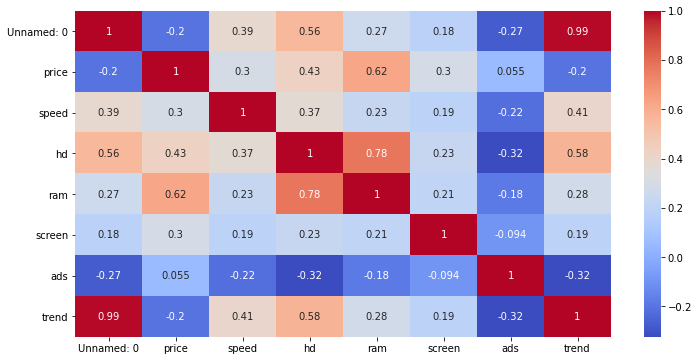

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not corroleted with the Price column. So now I am bit worried because that will not help us get a good model. Lets try and see. First we have to do some Feature Engineering on the categorical Features : cd, multi and premium.

In [7]:
df['cd'].nunique()

2

In [8]:
df['multi'].nunique()

2

In [9]:
df['premium'].nunique()

2

as we can see we have 2 unique types for all three variables, so it's going to be easy to to transform the features to dummies.

In [10]:
df_final=pd.get_dummies(df.drop(['Unnamed: 0'],axis=1),drop_first=True)

In [11]:
df_final.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1


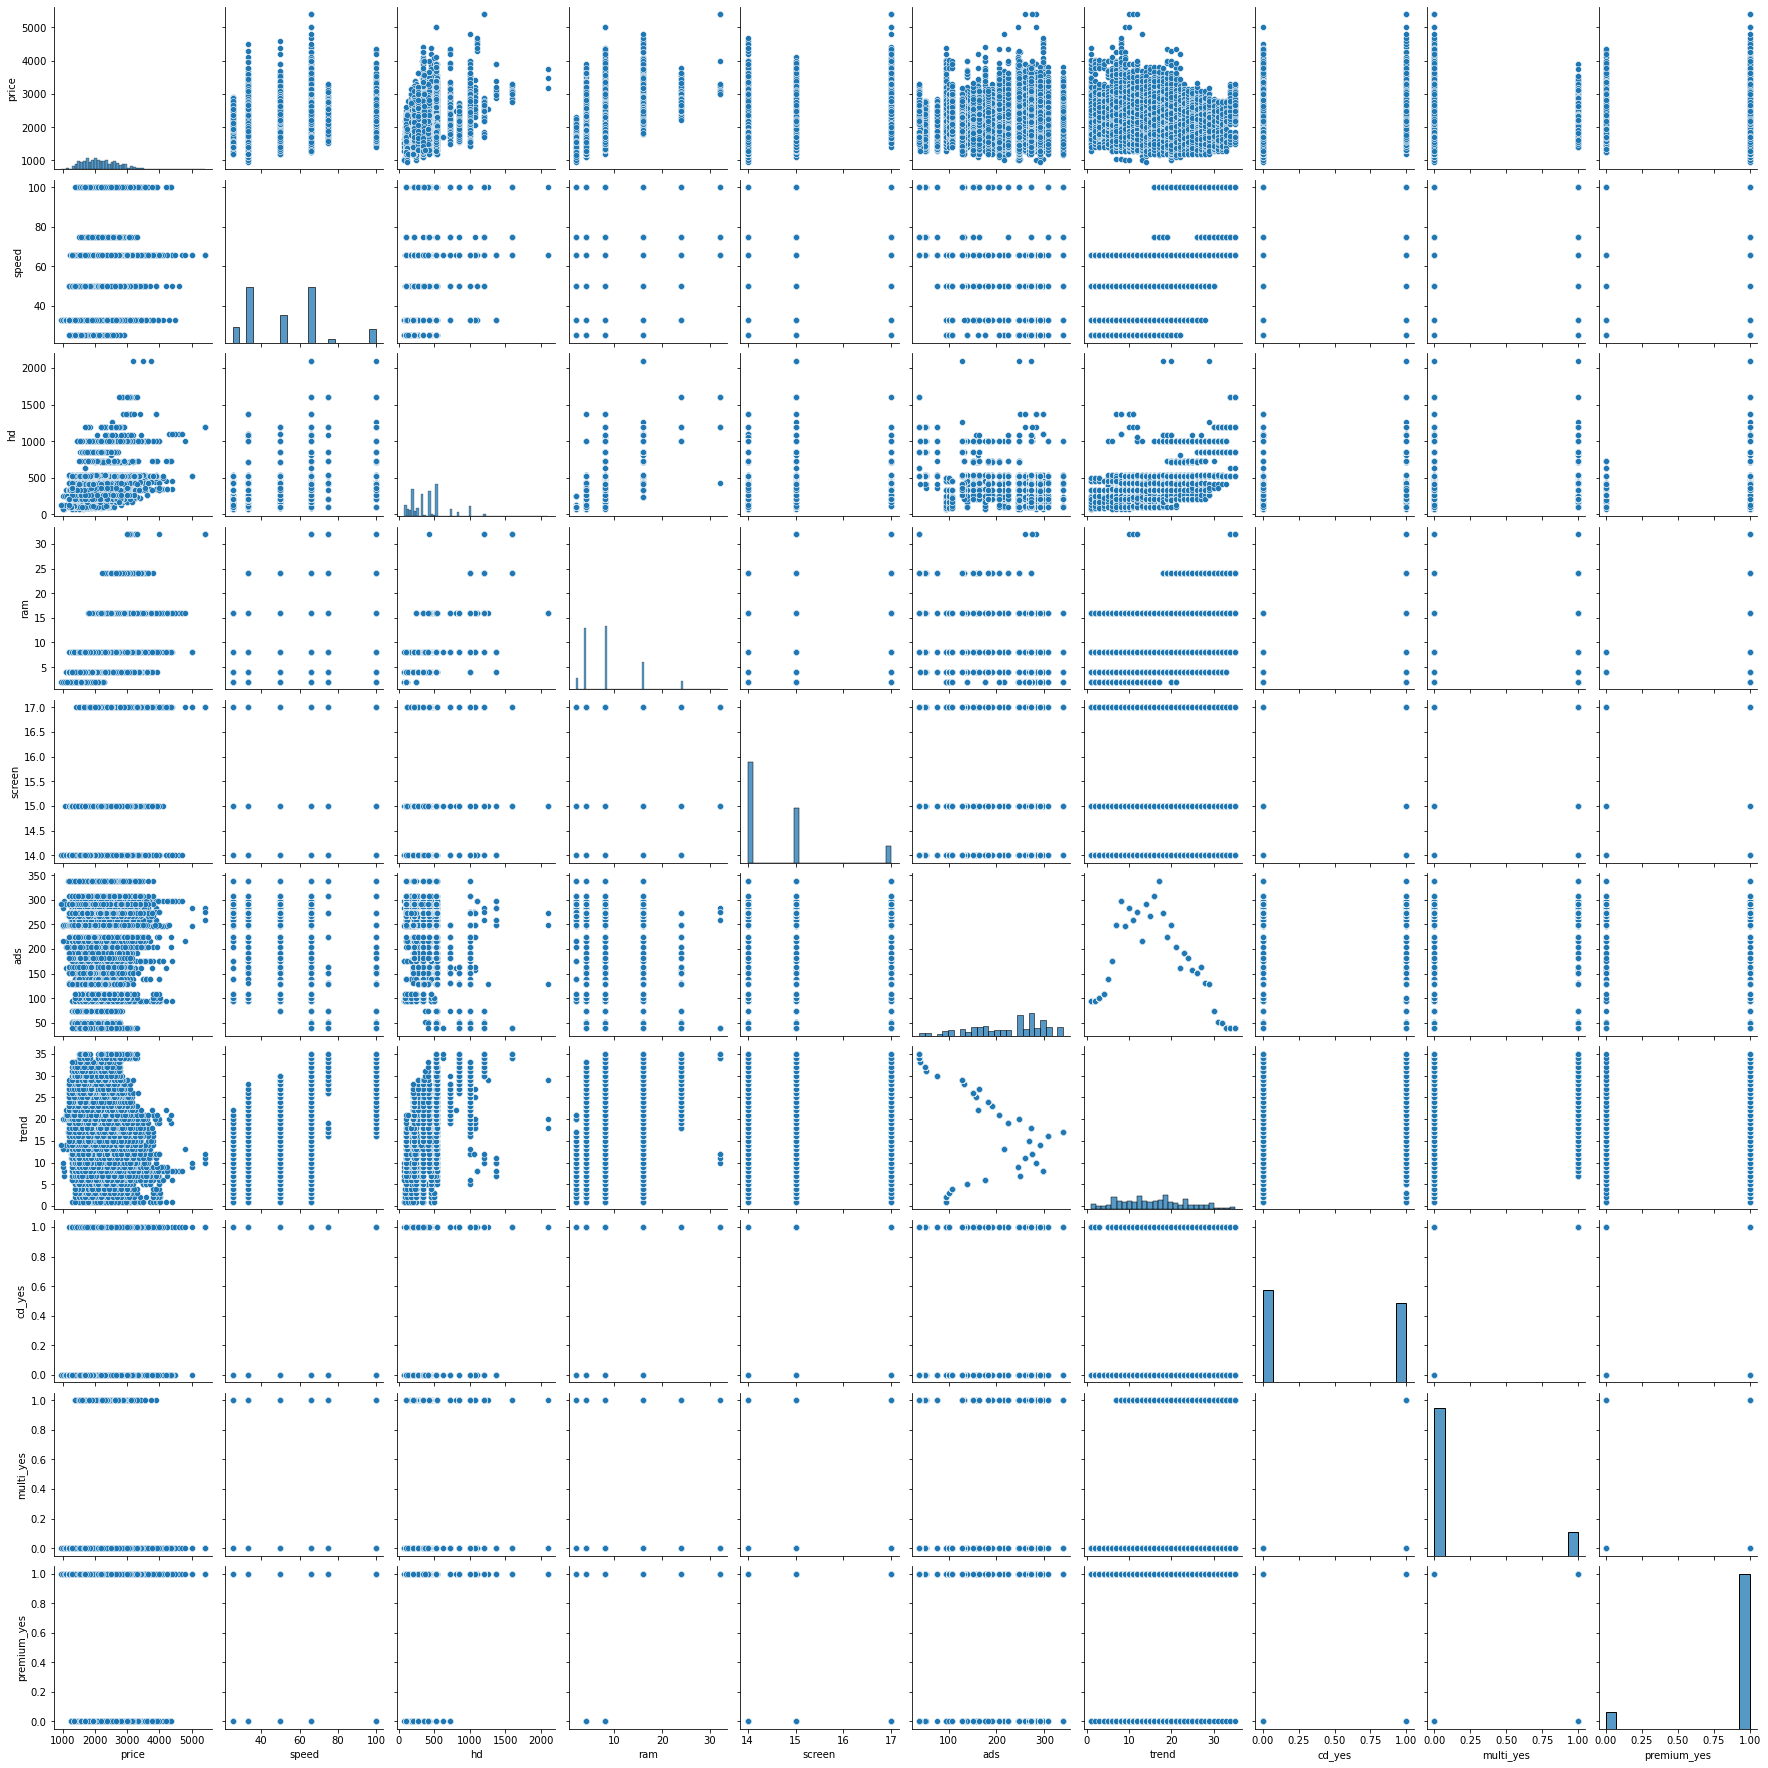

In [14]:
# Sctter plot and histogram between variables
sns.pairplot(df_final)

Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'ePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

#### Preparing the model on train data:

In [17]:
model_train = smf.ols("price ~ speed+hd+ram+screen+ads+trend+cd_yes+multi_yes+premium_yes", data =df_final ).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:26:09   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     307.9880     60.353      5.103      0.000     189.675     426.301
speed           9.3203      0.185     50.364      0.000       8.958       9.683
hd              0.7818      0.028     28.311      0.000       0.728       0.836
ram            48.2560      1.066     45.265      0.000      46.166      50.346
screen        123.0890      3.999     30.776      0.000     115.249     130.929
ads             0.6573      0.051     12.809      0.000       0.557       0.758
trend         -51.8496      0.629    -82.470      0.000     -53.082     -50.617
cd_yes         60.9167      9.516      6.402      0.000      42.263      79.571
multi_yes     104.3238     11.413      9.141      0.000      81.951     126.697
premium_yes  -509.2247     12.342    -41.259      0.000    -533.420    -485.030
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Prediction
pred = model_train.predict(df_final)
pred

0       2020.518889
1       2002.478116
2       2213.968113
3       2793.127639
4       2877.415391
           ...     
6254    1586.853395
6255    2072.985141
6256    2945.221470
6257    2285.550870
6258    2531.728954
Length: 6259, dtype: float64

In [21]:
# Error
resid  = pred - df_final.price
resid

0       521.518889
1       207.478116
2       618.968113
3       944.127639
4      -417.584609
           ...    
6254   -103.146605
6255   -150.014859
6256    291.221470
6257     90.550870
6258     41.728954
Length: 6259, dtype: float64

In [22]:
# RMSE value for data 
rmse = np.sqrt(np.mean(resid * resid))
rmse

275.1298188638716

##### To overcome the issues, LASSO and RIDGE regression are used

## LASSO MODEL:

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso(alpha = 0.13, normalize = True)

In [26]:
lasso.fit(df_final.iloc[:, 1:], df_final.price)

Lasso(alpha=0.13, normalize=True)

#### Coefficient values for all independent variables:

In [27]:
lasso.coef_

array([   8.64148222,    0.65933879,   49.771742  ,  113.0984382 ,
          0.52827241,  -47.24277634,   44.97699744,   66.30232167,
       -451.94935849])

In [28]:
lasso.intercept_

443.90432625942185

<BarContainer object of 9 artists>

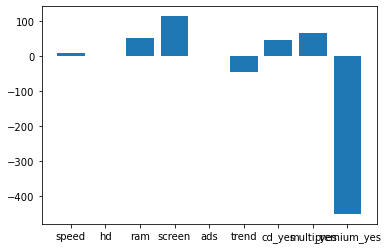

In [29]:
plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(df_final.columns[1:]))

In [30]:
lasso.alpha

0.13

In [35]:
pred_lasso = lasso.predict(df_final.iloc[:, 1:])
pred_lasso

array([2045.61905932, 2018.50412701, 2218.05798868, ..., 2950.39056862,
       2321.44805591, 2547.64493231])

#### Adjusted r-square:

In [33]:
lasso.score(df_final.iloc[:, 1:], df_final.price)

0.7715870508830522

#### RMSE:

In [34]:
np.sqrt(np.mean((pred_lasso - df_final.price)**2))

277.5589460664741

## RIDGE REGRESSION:

In [37]:
from sklearn.linear_model import Ridge

In [38]:
rm = Ridge(alpha = 0.4, normalize = True)

In [39]:
rm.fit(df_final.iloc[:, 1:], df_final.price)

Ridge(alpha=0.4, normalize=True)

##### Coefficients values for all the independent vairbales

In [41]:
rm.coef_

array([   5.55360065,    0.44603594,   37.90269085,   95.62538002,
          0.5891766 ,  -27.27411648,   51.55664688,   12.63451063,
       -281.47961608])

In [42]:
rm.intercept_

566.0963151800863

<BarContainer object of 9 artists>

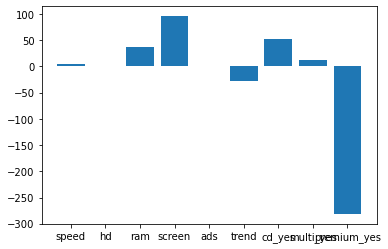

In [43]:
plt.bar(height = pd.Series(rm.coef_), x = pd.Series(df_final.columns[1:]))

In [44]:
rm.alpha

0.4

In [45]:
pred_rm = rm.predict(df_final.iloc[:, 1:])

#### Adjusted r-square:

In [46]:
rm.score(df_final.iloc[:, 1:], df_final.price)

0.6787299099037913

#### RMSE:

In [47]:
np.sqrt(np.mean((pred_rm - df_final.price)**2))

329.17740458674746

Among the both models the ridge model is better than lasso in terms of R^2 and RMSE values

## ELASTIC NET REGRESSION:

In [48]:
from sklearn.linear_model import ElasticNet 
enet = ElasticNet(alpha = 0.4)

In [49]:
enet.fit(df_final.iloc[:, 1:], df_final.price) 

ElasticNet(alpha=0.4)

###### Coefficients values for all the independent vairbales:

In [50]:
enet.coef_

array([   9.10661249,    0.74430448,   47.4043823 ,   99.39875326,
          0.88474258,  -48.05359927,   18.1287955 ,   29.06243389,
       -141.80997011])

In [51]:
enet.intercept_

275.9493719640561

<BarContainer object of 9 artists>

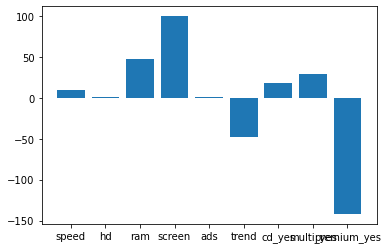

In [52]:
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(df_final.columns[1:]))

In [53]:
enet.alpha

0.4

In [54]:
pred_enet = enet.predict(df_final.iloc[:, 1:])

#### Adjusted r-square:

In [56]:
enet.score(df_final.iloc[:, 1:], df_final.price)

0.7410803337342227

#### RMSE:

In [57]:
np.sqrt(np.mean((pred_enet - df_final.price)**2))

295.5135427395324

###### Among the three models, Elastic net regression model can recommendable for this type of problem